In [1]:
# Importing required libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Reading the images
cameraman = cv.imread('cameraman.jpg',0)
moon = cv.imread('moon.jpg',0)
penguins = cv.imread('penguins.png',0)
rbc = cv.imread('RBCs.bmp',0)
rice = cv.imread('ricegrains.jpg',0)
tiger = cv.imread('tigerbw.jpg',0)
zebra = cv.imread('ZebrawithShadow.jpg',0)

### 1. c)

In [3]:
# making the images as NxN
N = 200

image = np.zeros((N,N))

def make_image(image, k):
    c = 0
    for i in range(0, N, k):
        c += 1
        for j in range(0, N):
            if(c % 2 == 1):
                image[j, i:(i + k)] = 0
            else:
                image[j, i:(i + k)] = 255
                
    return(image)
            
    
image_2 = make_image(image.copy(), k = 2)
image_4 = make_image(image.copy(), k = 4)
image_1 = make_image(image.copy(), k = 1)

### a) Displaying the images and their Fourier transforms:

                                                      Images


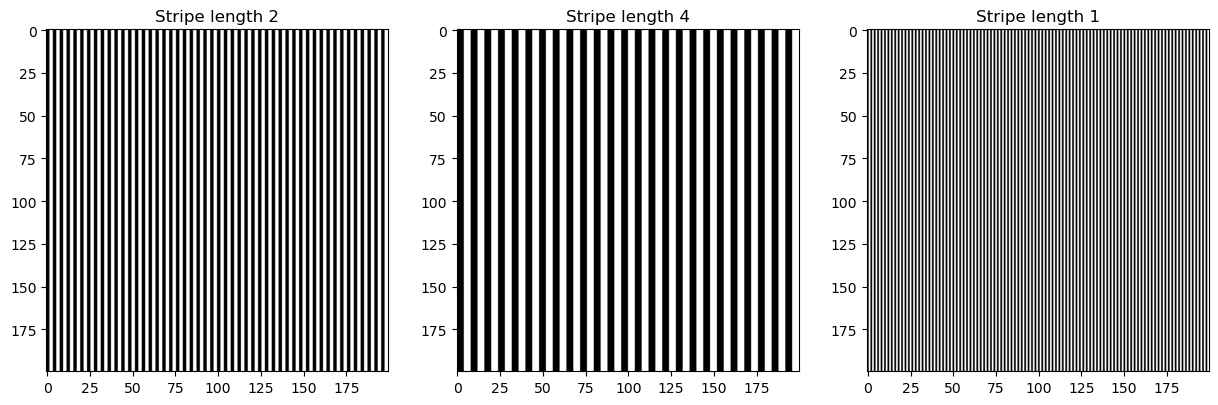

In [4]:
# Showing the images

fig, axs = plt.subplots(1,3, figsize = (15,8))

axs[0].imshow(image_2, cmap = 'gray')
axs[0].set_title('Stripe length 2')

axs[1].imshow(image_4, cmap = 'gray')
axs[1].set_title('Stripe length 4')

axs[2].imshow(image_1, cmap = 'gray')
axs[2].set_title('Stripe length 1')

print('Images')
plt.show()

In [5]:
# Fourier transform
def fourier(image):
    f = np.fft.fft2(image)
    trans_image = np.fft.fftshift(f)
    return np.abs(trans_image), trans_image[100,100]

image_2_f, dc_2 = fourier(image_2.copy())
image_4_f, dc_4 = fourier(image_4.copy())
image_1_f, dc_1 = fourier(image_1.copy())

In [6]:
# Showing that the dc values are the same for all three images
dc_1, dc_2, dc_4

((5100000+0j), (5100000+0j), (5100000+0j))

                                                   Fourier transforms


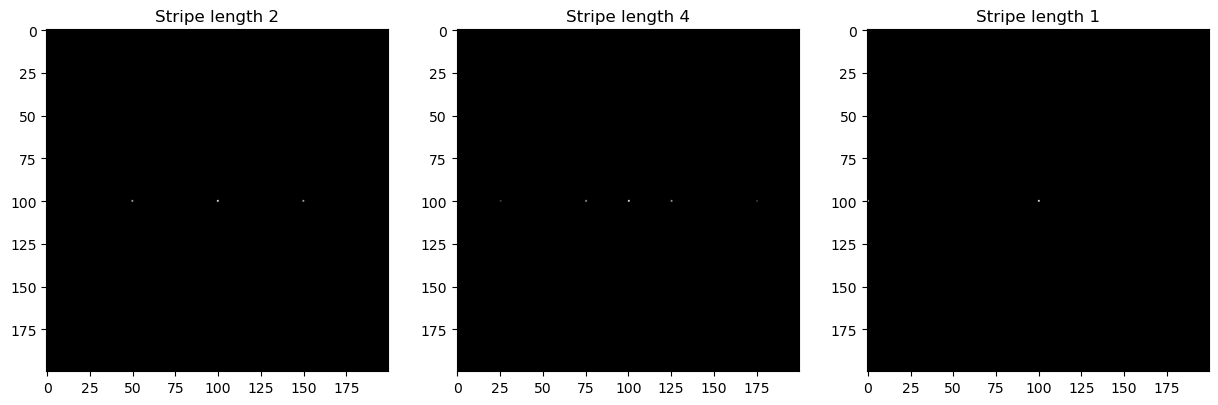

In [7]:
# Displaying the images

fig, axs = plt.subplots(1,3, figsize = (15,8))

axs[0].imshow(image_2_f, cmap = 'gray')
axs[0].set_title('Stripe length 2')

axs[1].imshow(image_4_f, cmap = 'gray')
axs[1].set_title('Stripe length 4')

axs[2].imshow(image_1_f, cmap = 'gray')
axs[2].set_title('Stripe length 1')

print('Fourier transforms')
plt.show()

### b) 
The components of the spectrum are limited to the x-axis alone as in the original images, the intensity values only change over the x-axis (or horizontally) in the spatial domain. There is no change along the y-axis (or vertically) and thus the components of the spectrum become restricted to the x-axis.

### c) 
The fourier transforms of the three images have been displayed above.

### d) 
The image with stripes of one pixel wide and the image with stripes 2 pixels wide, we see that the dc components are the same. This is because the dc component is essentially the average of intensities of white and black signals. Though the stripe lengths are different for the two images, they are constant w.r.t an image and hence the average intensity remains the same for both white and black signals in both images. Thus, the dc components are the same for the two images.

### 2.

In [8]:
# Defining the filters

# Box filters
box_filter_3 = np.ones((3,3), np.float32)/9
box_filter_7 = np.ones((7,7), np.float32)/49

# Gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian_filter = x * x.T

# Laplacian filter
laplacian = np.array([[11, 9, 9],
                    [-4, 1, -1],
                    [-21, -13, -16]]) 

# Sobel filters
# sobel in x direction
sobel_x = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# sobel in y direction
sobel_y = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

# filters
filters = [box_filter_3, box_filter_7, gaussian_filter, laplacian, sobel_x, sobel_y]
names = ['Box filter 3x3', 'Box filter 7x7', 'Gaussian filter', 'Laplacian filter', 'Sobel filter(x direction)', 'Sobel filter(y direction)']

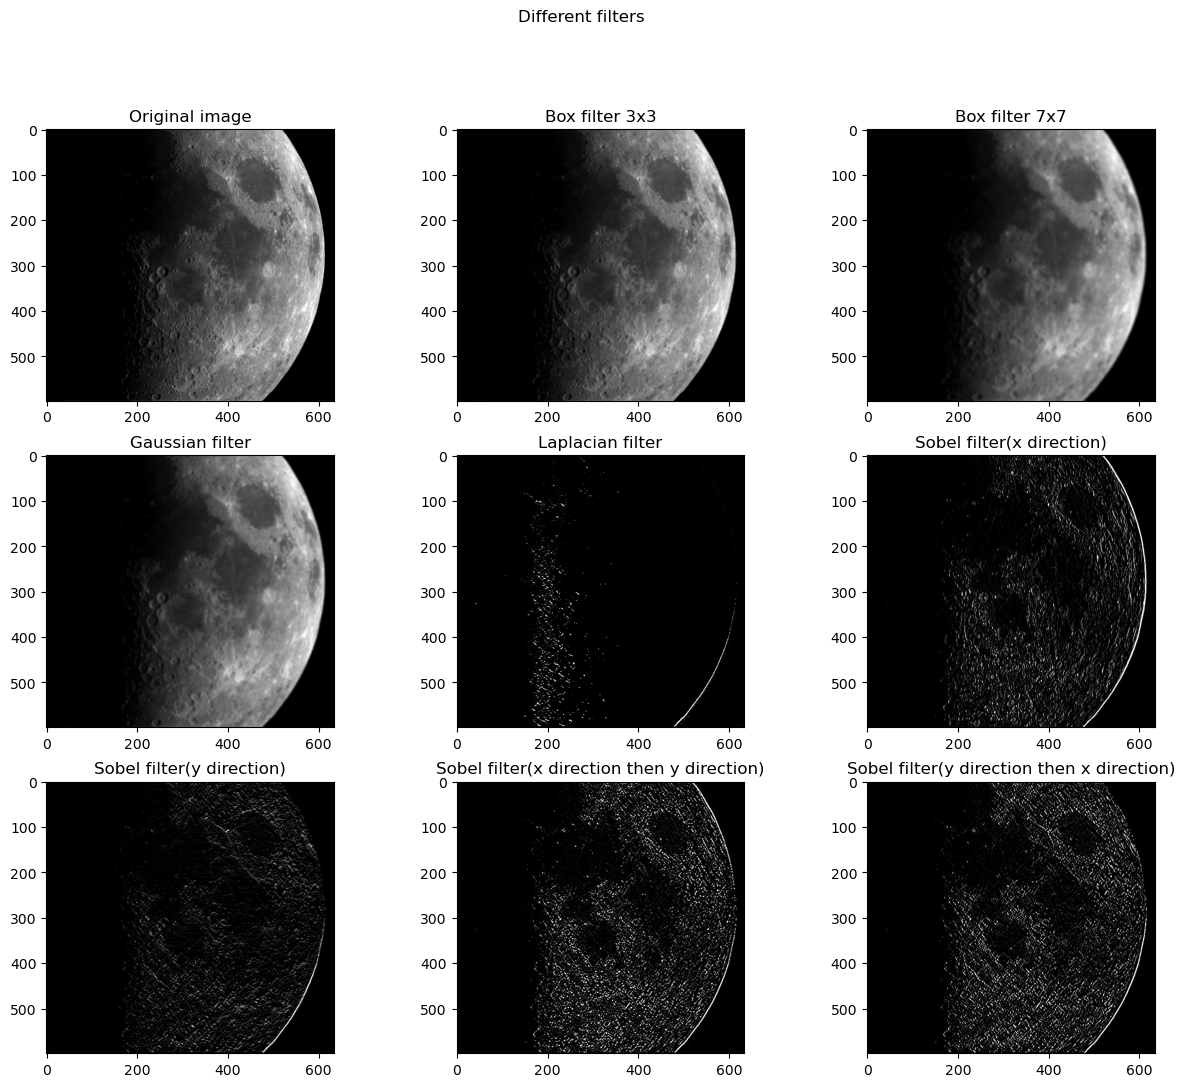

In [9]:
# Display the images
fig, axs = plt.subplots(3,3, figsize = (15, 12))

axs[0,0].imshow(moon, cmap = 'gray')
axs[0,0].set_title('Original image')

k = 0
flag = 0
for i in range(0,3):
    for j in range(0,3):
        if i == 0 and j == 0:
            continue
        if i == 2 and j == 1:
            flag = 1
            break
        axs[i,j].imshow(cv.filter2D(moon,-1,filters[k]), cmap = 'gray')
        axs[i,j].set_title(names[k])
        k = k + 1
    if flag == 1:
        break
        
axs[2,1].imshow(cv.filter2D(cv.filter2D(moon,-1,sobel_x), -1, sobel_y), cmap = 'gray')
axs[2,1].set_title('Sobel filter(x direction then y direction)')

axs[2,2].imshow(cv.filter2D(cv.filter2D(moon,-1,sobel_y), -1, sobel_x), cmap = 'gray')
axs[2,2].set_title('Sobel filter(y direction then x direction)')

plt.suptitle('Different filters')
plt.show()

### 3.

In [10]:
# Take user input
print('Enter the length of the rectangle: ')
length = int(input())
print('Enter the breadth of the rectangle: ')
breadth = int(input())

# (40,20)

Enter the length of the rectangle: 
40
Enter the breadth of the rectangle: 
20


In [11]:
# Generate white rectangle

rectangle = np.zeros((100,100))
start_x = 50 - int(breadth/2)
end_x = 50 + int(breadth/2)
start_y = 50 - int(length/2)
end_y = 50 + int(length/2)
rectangle[start_x: end_x, start_y: end_y] = 255

In [12]:
# Calculate the spectrums 
dft = cv.dft(np.float32(rectangle),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum, phase_spectrum = cv.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])
magnitude_spectrum = 20 * np.log(1 + magnitude_spectrum)
power_spectrum = np.square(magnitude_spectrum)

                                                 Various spectrums


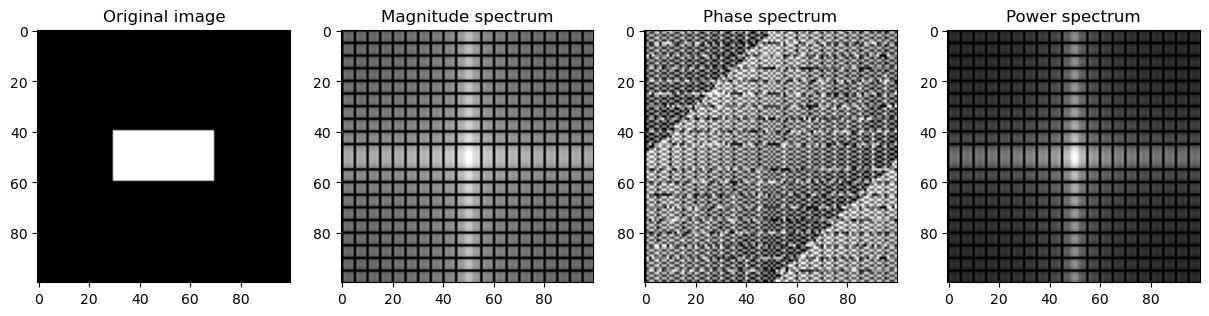

In [13]:
# Display the images
fig, axs = plt.subplots(1,4, figsize = (15, 10))

axs[0].imshow(rectangle, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(magnitude_spectrum, cmap = 'gray')
axs[1].set_title('Magnitude spectrum')

axs[2].imshow(phase_spectrum, cmap = 'gray')
axs[2].set_title('Phase spectrum')

axs[3].imshow(power_spectrum, cmap = 'gray')
axs[3].set_title('Power spectrum')

#plt.suptitle('Various spectrums')
print('                                                 Various spectrums')

plt.show()

### 4.

### a)

In [14]:
# Defining the filters

# Box filters
box_filter_3 = np.ones((3,3), np.float32)/9
box_filter_5 = np.ones((5,5), np.float32)/25
box_filter_7 = np.ones((7,7), np.float32)/49

# Gaussian filters
# 3x3
x = cv.getGaussianKernel(3, 1.5)
gaussian_filter_3 = x * x.T

# 5x5
x = cv.getGaussianKernel(5, 1.5)
gaussian_filter_5 = x * x.T

# 7x7
x = cv.getGaussianKernel(7, 1.5)
gaussian_filter_7 = x * x.T

# Median filters
median_3 = cv.medianBlur(rice, 3)
median_5 = cv.medianBlur(rice, 5)
median_7 = cv.medianBlur(rice, 7)

filters = [box_filter_3, box_filter_5, box_filter_7, gaussian_filter_3, gaussian_filter_5, gaussian_filter_7, median_3, median_5, median_7]
names = ['Box filter 3x3', 'Box filter 5x5', 'Box filter 7x7', 'Gaussian filter 3x3', 'Gaussian filter 5x5', 'Gaussian filter 7x7', 'Median filter 3x3', 'Median filter 5x5', 'Median filter 7x7']

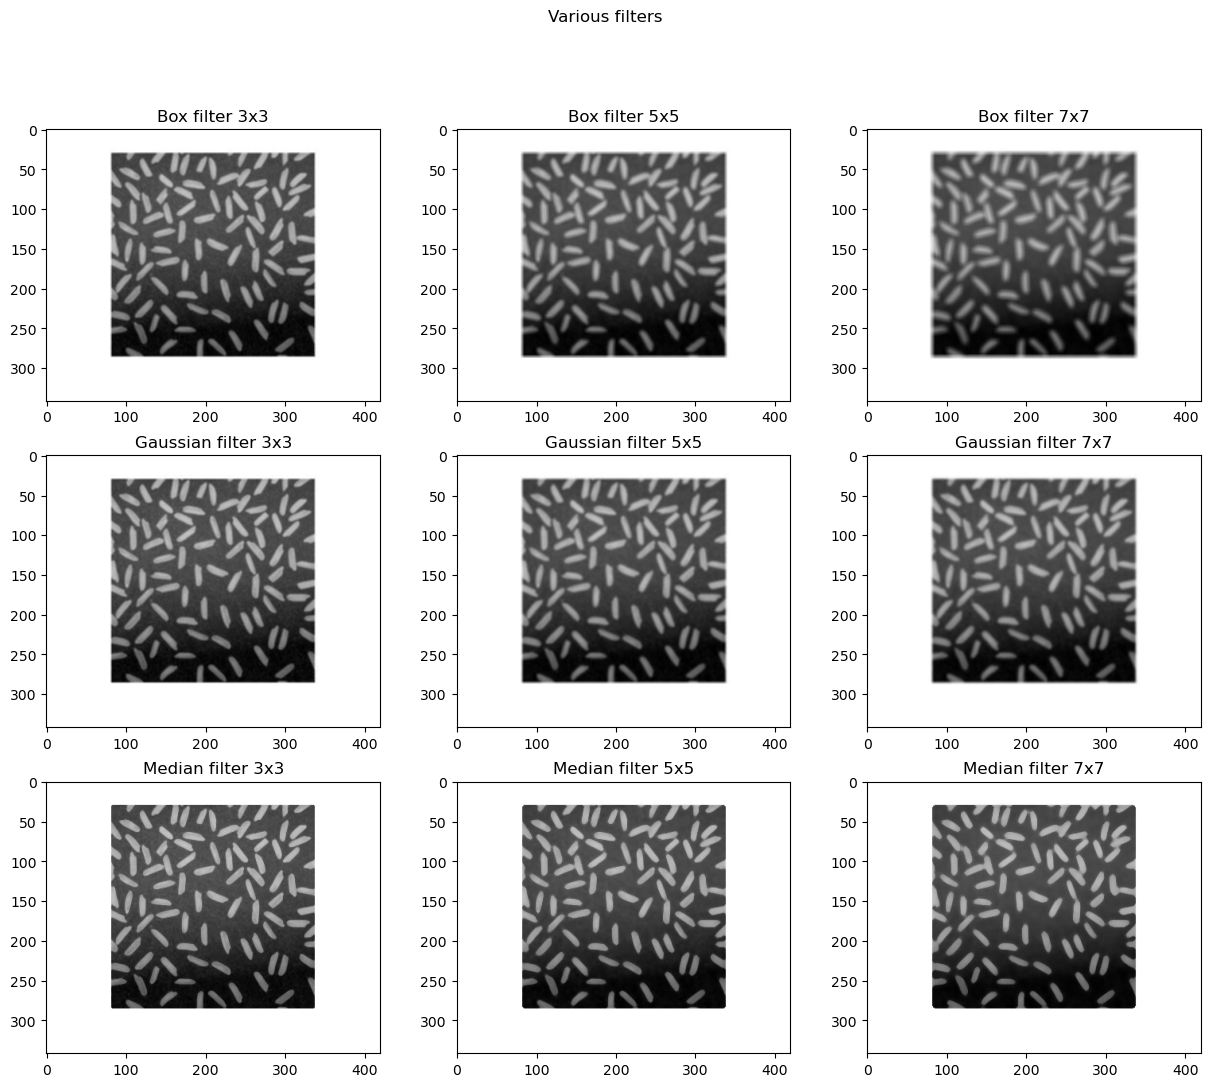

In [15]:
# Display the images
fig, axs = plt.subplots(3,3, figsize = (15, 12))

k = 0
for i in range(0,3):
    for j in range(0,3):
        if i == 0 or i == 1:
            axs[i,j].imshow(cv.filter2D(rice,-1,filters[k]), cmap = 'gray')
            axs[i,j].set_title(names[k])
        else:
            axs[i,j].imshow(filters[k], cmap = 'gray')
            axs[i,j].set_title(names[k])
        k = k + 1

plt.suptitle('Various filters')
plt.show()

### b)

In [16]:
# Gaussian filters
def gaussian_pass_low(img, radius = 20):
    
    f = np.fft.fft2(img)
    imf = np.fft.fftshift(f)
    c, r = imf.shape[:2]

    cx = int(c/2)
    cy = int(r/2)
    H = np.zeros((c,r))

    for i in range(0, c):
        for j in range (0, r):
            d = (i - cx)**2 + (j - cy)**2
            H[i,j] = np.exp(-(d/(2 * (radius**2))))
            
    final_f = imf * H
        
    final = np.abs(np.fft.ifft2(final_f))
    return(final)

def gaussian_pass_high(img, radius = 20):
    
    f = np.fft.fft2(img)
    imf = np.fft.fftshift(f)
    c, r = imf.shape[:2]

    cx = int(c/2)
    cy = int(r/2)
    H = np.zeros((c,r))

    for i in range(0, c):
        for j in range (0, r):
            d = (i - cx)**2 + (j - cy)**2
            H[i,j] = np.exp(-(d/(2 * (radius**2))))
            
    final_f = imf * (1 - H)
        
    final = np.abs(np.fft.ifft2(final_f))
    return(final)

In [17]:
# Butterworth filters 
def butterworth_low(img, radius = 20, n = 4):
    
    f = np.fft.fft2(img)
    imf = np.fft.fftshift(f)
    c, r = imf.shape[:2]

    cx = int(c/2)
    cy = int(r/2)
    H = np.zeros((c,r))

    for i in range(0, c):
        for j in range (0, r):
            d = ((i - cx)**2 + (j - cy)**2) ** 0.5
            H[i,j] = 1/ (1 + (d/radius)**(2*n))
            
    final_f = imf * H
    final = np.abs(np.fft.ifft2(final_f))
    return(final)

def butterworth_high(img, radius = 20, n = 4):
    
    f = np.fft.fft2(img)
    imf = np.fft.fftshift(f)
    c, r = imf.shape[:2]

    cx = int(c/2)
    cy = int(r/2)
    H = np.zeros((c,r))

    for i in range(0, c):
        for j in range (0, r):
            d = ((i - cx)**2 + (j - cy)**2) ** 0.5
            H[i,j] = 1/ (1 + (d/radius)**(2*n))
   
    final_f = imf * (1 - H)
    final = np.abs(np.fft.ifft2(final_f))
    return(final)

### We have chosen the radius to be 20 units.

In [18]:
# applying the low pass filters to the image
buttworth_low = butterworth_low(rice.copy())
gaussian_low = gaussian_pass_low(rice.copy())

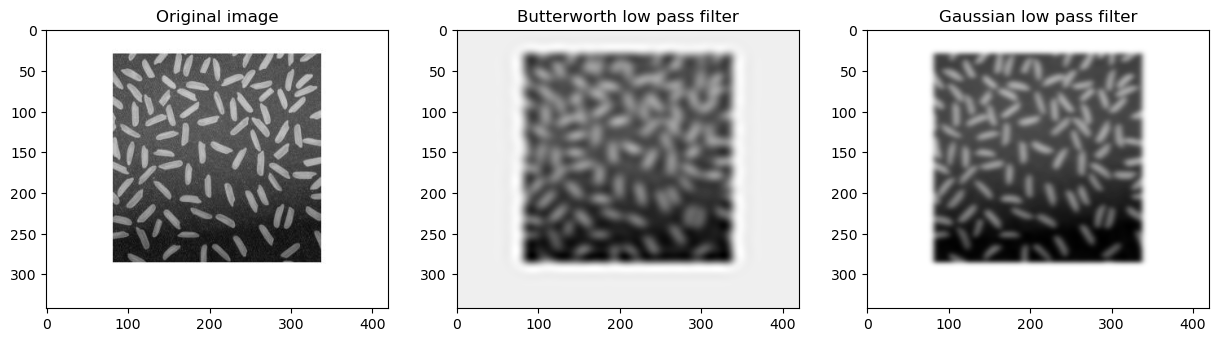

In [19]:
# Display the images
fig, axs = plt.subplots(1,3, figsize = (15, 12))

axs[0].imshow(rice, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(buttworth_low, cmap = 'gray')
axs[1].set_title('Butterworth low pass filter')

axs[2].imshow(gaussian_low, cmap = 'gray')
axs[2].set_title('Gaussian low pass filter')

plt.show()

### 5.

### a)

In [20]:
# Gaussian 3x3 filter

blur = cv.GaussianBlur(tiger, (3,3), 0)
                       
# difference image
mask = tiger - blur

# new image
unsharp = tiger + 1 * mask

 Unsharp Masking 


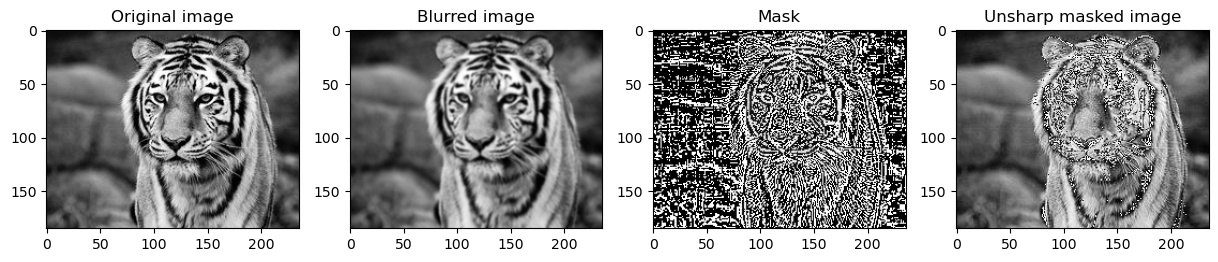

In [21]:
# Display the steps of unsharp masking
images = [tiger, blur, mask, unsharp]
captions = ['Original image', 'Blurred image', 'Mask', 'Unsharp masked image']

fig, axs = plt.subplots(1,4, figsize = (15, 10))

k = 0
for i in range(0,4):
#     for j in range(0,2):
    axs[i].imshow(images[k], cmap = 'gray')
    axs[i].set_title(captions[k])
    k += 1

print(' Unsharp Masking ')
plt.show()

In [22]:
# Laplace and Sobel edge detectors

# laplacian filter
laplacian = np.array([[11, 9, 9],
                    [-4, 1, -1],
                    [-21, -13, -16]]) 
# Sobel filters
# sobel in x direction
sobel_x = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

# sobel in y direction
sobel_y = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

laplace_filter = cv.filter2D(tiger, -1, laplacian)
sobelx_filter = cv.filter2D(tiger, -1, sobel_x)
sobely_filter = cv.filter2D(tiger, -1, sobel_y)
sobelxy_filter = cv.filter2D(sobely_filter, -1, sobel_x)

In [23]:
# putting all filtered images in a list to display

# images
images = [tiger, unsharp, laplace_filter, sobelx_filter, sobely_filter, sobelxy_filter]

# captions
captions = ['Original image', 'Unsharp masking', 'Laplacian edge detection', 'Sobel edge detection (x direction)', 'Sobel edge detection (y direction)', 'Sobel edge detection (first y then x direction)']

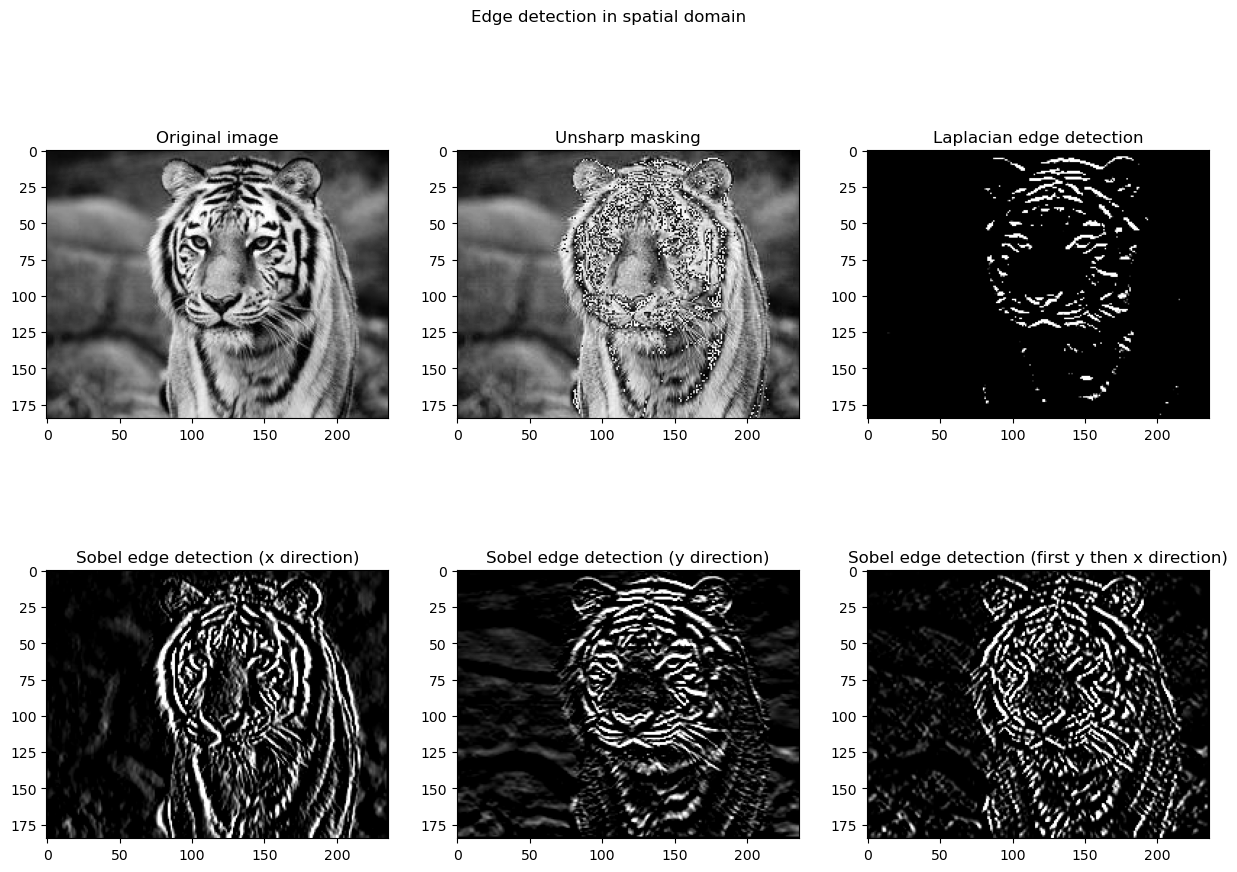

In [24]:
# Display the images
fig, axs = plt.subplots(2,3, figsize = (15, 10))

k = 0
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].imshow(images[k], cmap = 'gray')
        axs[i,j].set_title(captions[k])
        k += 1

plt.suptitle('Edge detection in spatial domain')
plt.show()

### b)

In [25]:
# applying the high pass filters to the image
buttworth_high = butterworth_high(tiger.copy())
gaussian_high = gaussian_pass_high(tiger.copy())

 Edge detection in frequency domain 


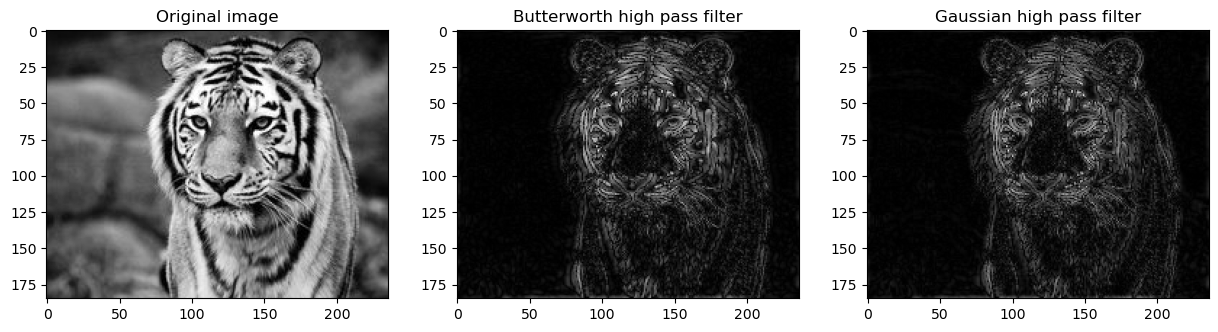

In [26]:
# Display the images
fig, axs = plt.subplots(1,3, figsize = (15, 12))

axs[0].imshow(tiger, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(buttworth_high, cmap = 'gray')
axs[1].set_title('Butterworth high pass filter')

axs[2].imshow(gaussian_high, cmap = 'gray')
axs[2].set_title('Gaussian high pass filter')

print(' Edge detection in frequency domain ')

plt.show()

### 6.

### a) Spatial domain

In [27]:
# Average filter of size 7x7
average_filter = np.ones((7,7))/49

start_spatial = time.time()

# padding the image
borders = 3
image = cv.copyMakeBorder(cameraman.copy(), borders, borders, borders, borders, cv.BORDER_CONSTANT)

# applying the average filter to the image
filter_spatial = cv.filter2D(image, -1, average_filter)

# extracting the useful part of the image
final_image_spatial = filter_spatial[borders:(cameraman.shape[0] + borders), borders:(cameraman.shape[1] + borders)].copy()

end_spatial = time.time()

### b) Frequency domain

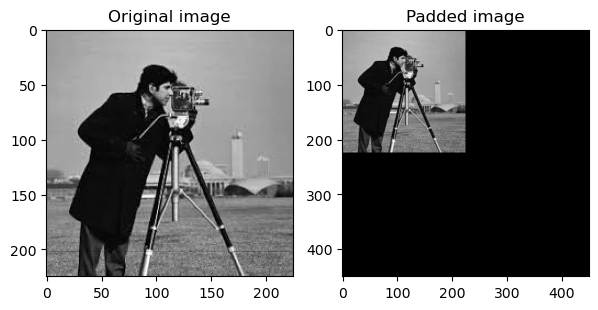

In [28]:
# padding image
borders = cameraman.shape[0]
image = cv.copyMakeBorder(cameraman.copy(), 0, borders, 0, borders, cv.BORDER_CONSTANT)

# padding kernel
kernel = np.zeros(image.shape)
kernel[1:8, 1:8] = 1/49

fig, axs = plt.subplots(1,2, figsize = (7,5))
axs[0].imshow(cameraman, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(image, cmap = 'gray')
axs[1].set_title('Padded image')

plt.show()

In [29]:
# transforming the image and the kernel

# time taken
start_freq = time.time()

# image
f = np.fft.fft2(image)
trans_image = np.fft.fftshift(f)

# kernel
f = np.fft.fft2(kernel)
trans_kernel = np.fft.fftshift(f)

# multiplication of image and kernel in frequency domain
multi = trans_image * trans_kernel

# transform the image back to spatial domain
result = np.abs(np.fft.ifft2(multi))

# end time
end_freq = time.time()

In [30]:
# final image and the useful part of it
final_image_freq = result[4: cameraman.shape[0] + 4, 4: cameraman.shape[1] + 4].copy()

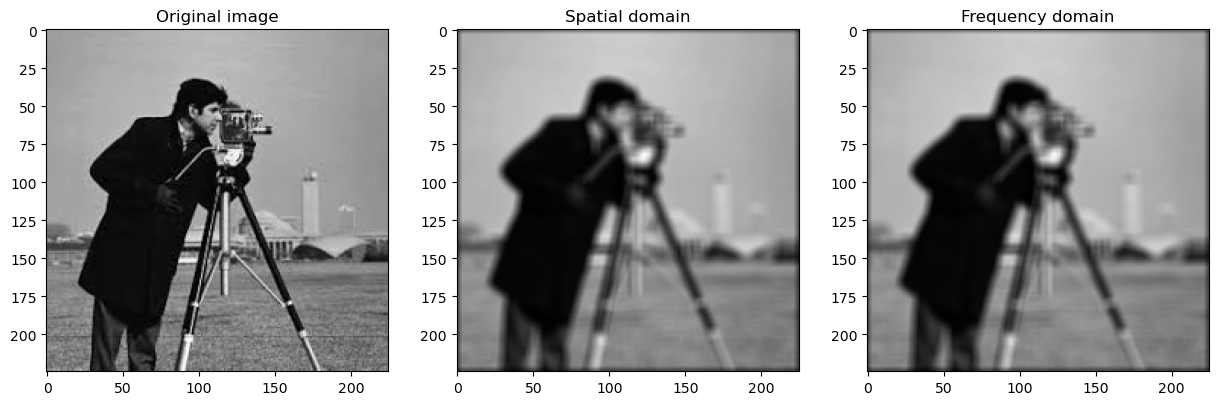

In [31]:
# displaying the images
fig, axs = plt.subplots(1,3, figsize = (15,8))

axs[0].imshow(cameraman, cmap = 'gray')
axs[0].set_title('Original image')

axs[1].imshow(final_image_spatial, cmap = 'gray')
axs[1].set_title('Spatial domain')

axs[2].imshow(final_image_freq, cmap = 'gray')
axs[2].set_title('Frequency domain')

plt.show()

In [35]:
# Displaying the time required in the 2 domains
print('Time taken to apply the filter in the spatial domain: ', round(end_spatial - start_spatial, 3), ' seconds')
print('Time taken to apply the filter in the frequency domain: ', round(end_freq - start_freq, 3), ' seconds')

Time taken to apply the filter in the spatial domain:  0.003  seconds
Time taken to apply the filter in the frequency domain:  0.048  seconds


Therefore when we do filtering in the frequency domain, it works slightly faster than in the spatial domain.